# Seaborn: KDEplot

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cars = sns.load_dataset('mpg').dropna()

cars.shape

(392, 9)

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Intro Visuals

In [5]:
hp = cars.horsepower
hp

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64

In [21]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

<Figure size 576x360 with 0 Axes>

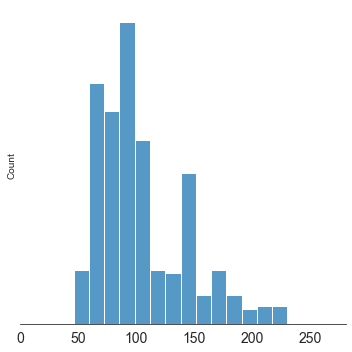

In [31]:
plt.figure(figsize=(8,5))
sns.displot(hp, kde=False)

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout(); # Fit the figure to the window

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


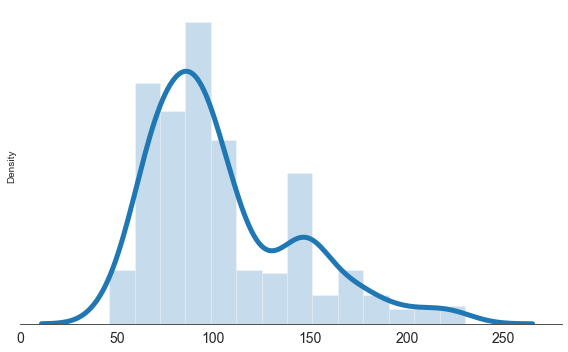

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})
# alpha -> opacity (0->Transparent, 1->Opaque)
# zorder -> z-order of the plot (which part shows on top)

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

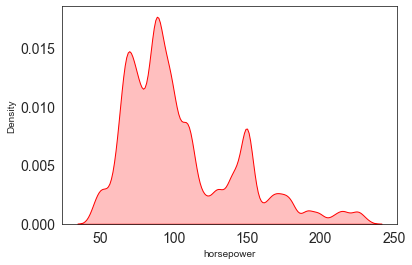

In [35]:
sns.kdeplot(hp, shade=True, color='r',bw_method=0.1)
# bw_method -> bandwidth method (0->Scott, 1->Silverman)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

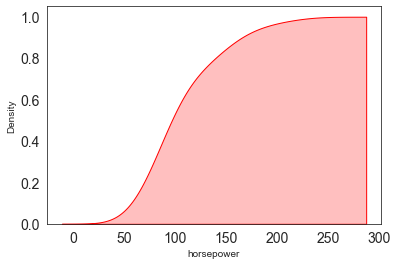

In [36]:
sns.kdeplot(hp, shade=True, color='r',bw_method=0.5,cumulative=True)

## "How It Works" Visuals

In [37]:
import numpy as np
import scipy.stats as stats

In [41]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [39]:
blue, orange, green, red = sns.color_palette()[:4]
blue

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [42]:
pts = [1, 3, 3.5, 4, 6, 8]

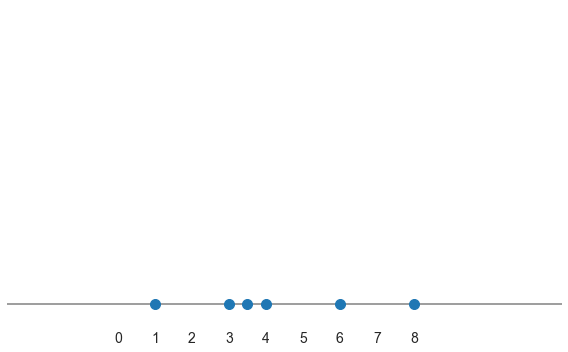

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
plt.axhline(0, color='gray', zorder=0) #axhline(y, xmin, xmax, color, zorder) -> horizontal line
plt.ylim(-0.1, 1.5)
plt.xlim(-3, 12)

plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();

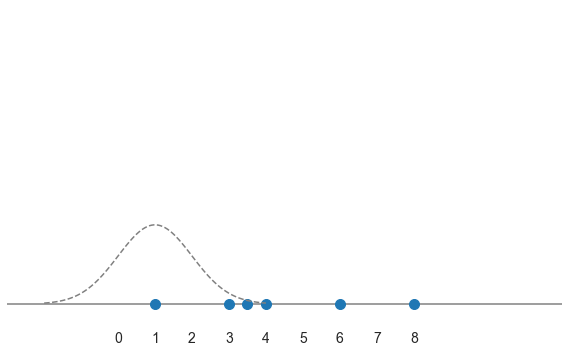

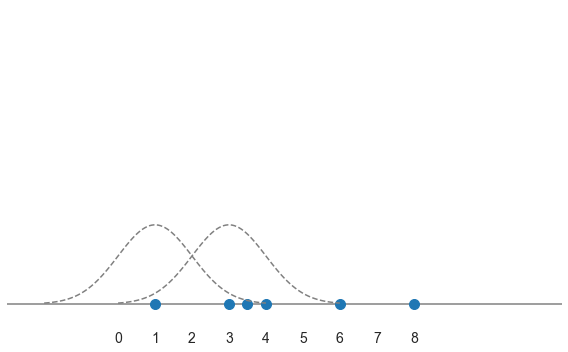

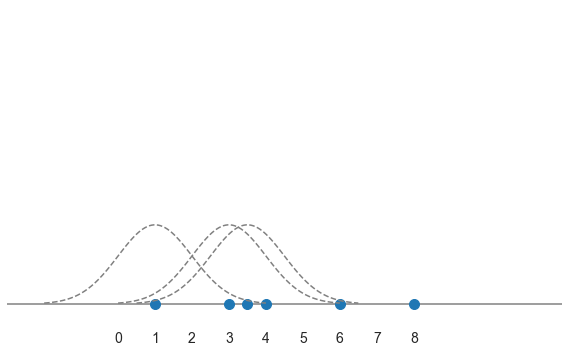

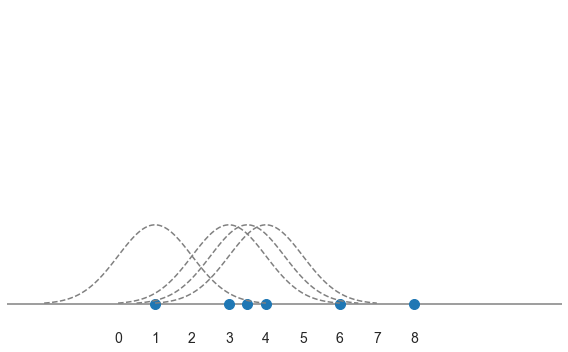

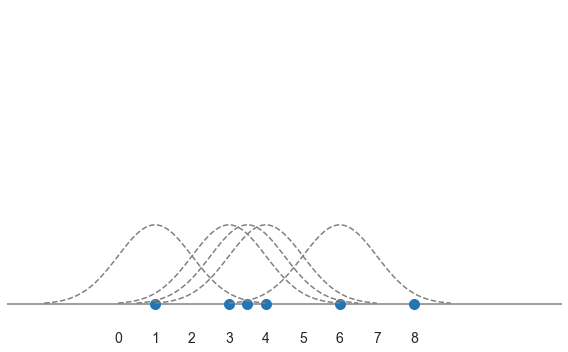

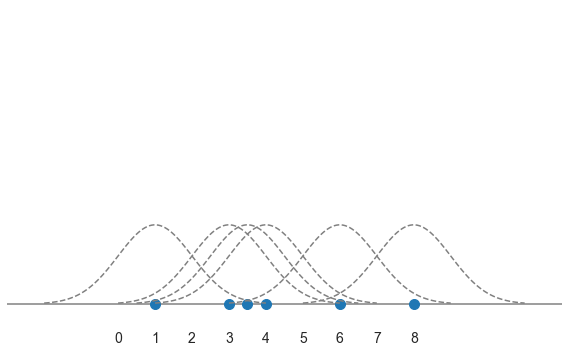

In [47]:
for i in range(len(pts)):
    plt.figure(figsize=(8, 5))
    for point in pts[0:i+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();

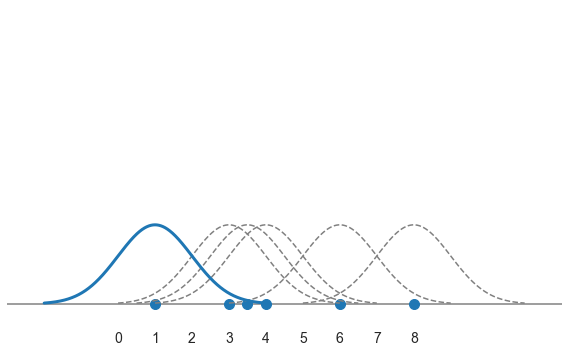

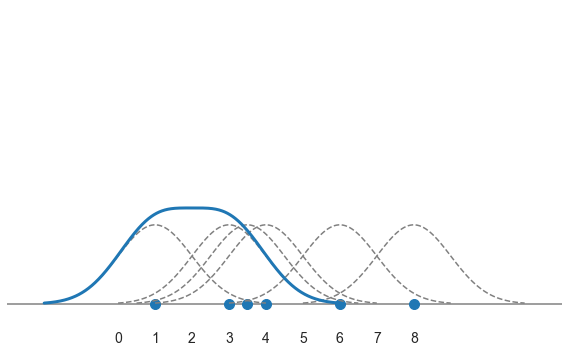

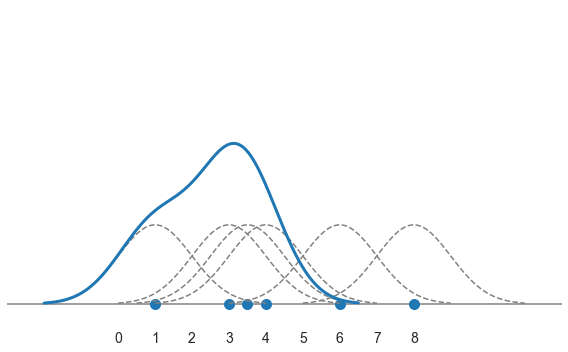

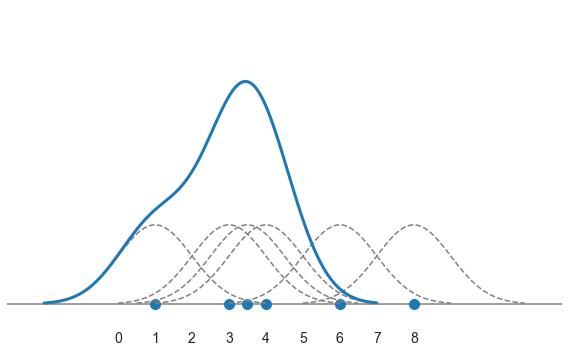

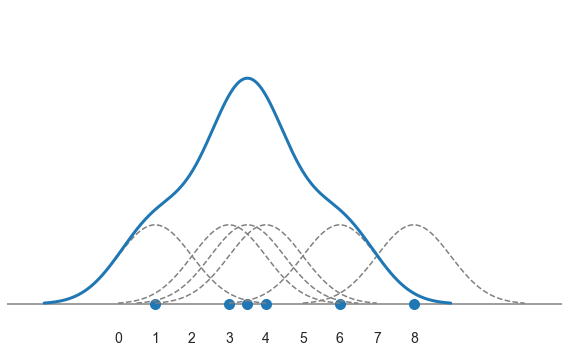

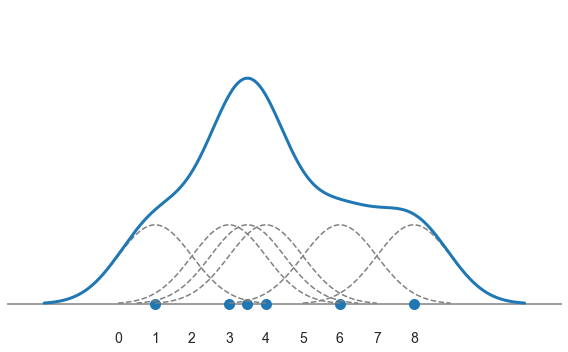

In [49]:
for i in range(1, len(pts)+1):
    plt.figure(figsize=(8, 5))
    for point in pts[0:len(pts)+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)

    total_x = np.linspace(pts[0] - 3*sigma, pts[i-1] + 3*sigma, 1000)
    total = sum([stats.norm.pdf(total_x, pts[j], sigma) for j in range(i)])
    plt.plot(total_x, total, color=blue, lw=3)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();
    #plt.savefig(f'02KDE_addkernel{i}.svg');

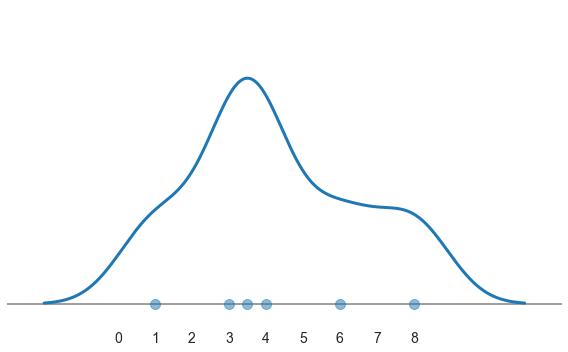

In [50]:
plt.figure(figsize=(8,5))
plt.plot(total_x, total, color=blue, lw=3)
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, alpha=0.5)
plt.axhline(0, color='gray', zorder=0)
plt.xlim(-3, 12)
plt.ylim(-0.1, 1.5)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();

### Other Kernels

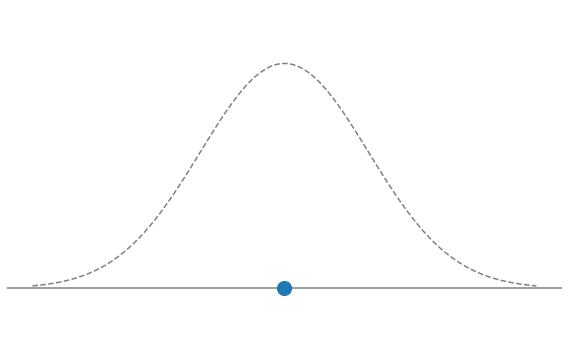

In [51]:
plt.figure(figsize=(8, 5))

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)

plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

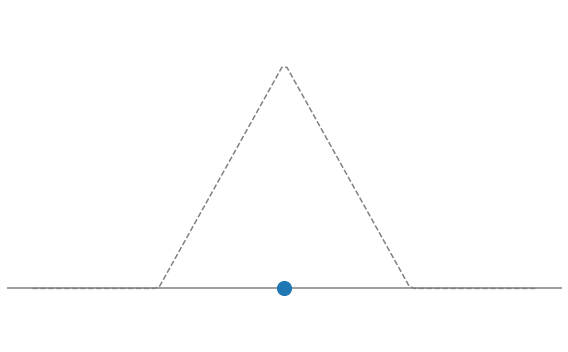

In [52]:
plt.figure(figsize=(8, 5))

def build_tri_kernel(x, center=0, sigma=1):
    m = 0.4/sigma
    if x < (center-sigma):
        return 0
    elif x < center:
        return m*x + m*(sigma-center)
    elif x < (center+sigma):
        return -m*x + m*(sigma + center)
    else:
        return 0  

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, [build_tri_kernel(val, center=mu, sigma=1.5) for val in x], 
         linestyle='--', color='gray', zorder=2)
plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

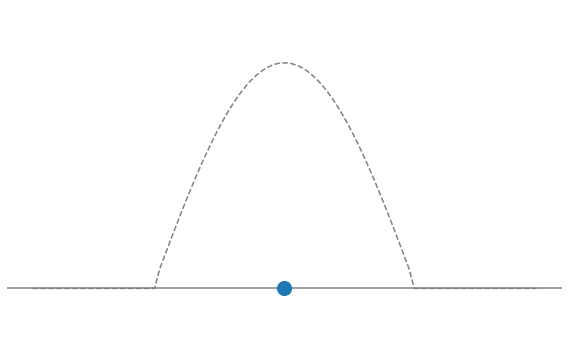

In [53]:
plt.figure(figsize=(8, 5))

def build_cos_kernel(x, center=0, sigma=1):
    if np.abs(x - center) < sigma:
        return 0.4*np.cos(x-center)
    else:
        return 0  

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, [build_cos_kernel(val, center=mu, sigma=1.5) for val in x], 
         linestyle='--', color='gray', zorder=2)
plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

## Univariate (1D)

In [54]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


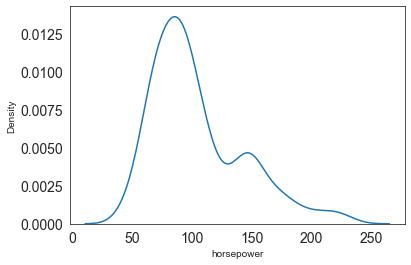

In [55]:
sns.kdeplot(cars.horsepower);
# KDE plot - Used for frequency distribution of data

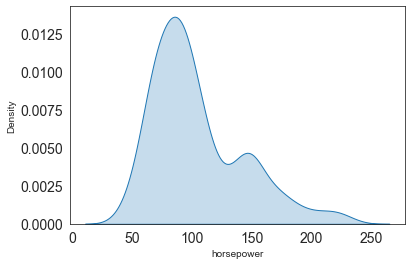

In [56]:
sns.kdeplot(cars.horsepower, shade=True);

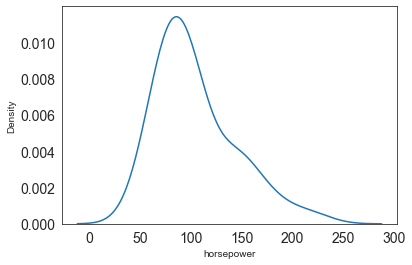

In [58]:
sns.kdeplot(cars.horsepower, bw_method=0.5);
# bw_method - bandwidth method
# Lesser the bandwidth, lesser the smoothness

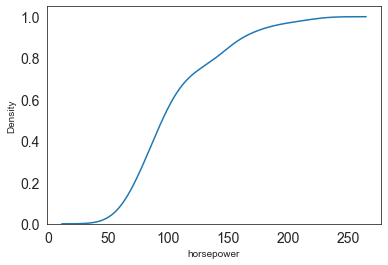

In [59]:
sns.kdeplot(cars.horsepower, cumulative=True);

### Bandwidth Widget

In [60]:
from ipywidgets import interact, interactive, HBox, VBox, interactive_output

from IPython.display import display

In [65]:
def bandwidth_widget(bw=10):
    sns.kdeplot(cars.horsepower, bw_method=bw, lw=3, shade=True)
    plt.xlim(-30, 300)
    plt.ylim(0, 0.02)

In [66]:
interactive(bandwidth_widget, bw=(0.1, 30, 0.5))

interactive(children=(FloatSlider(value=10.0, description='bw', max=30.0, min=0.1, step=0.5), Output()), _dom_…

## Bivariate (2D)

### Bivariate Intro

In [67]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [75]:
sns.set_style('whitegrid')
# mpg - miles per gallon

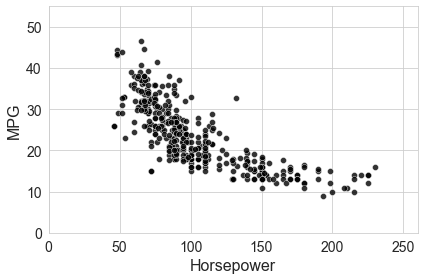

In [79]:
#sns.kdeplot(cars.horsepower, cars.mpg)
sns.scatterplot(x=cars.horsepower, y=cars.mpg, color='black', alpha=0.8)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=16)
plt.ylabel('MPG', fontsize=16)
plt.tight_layout();

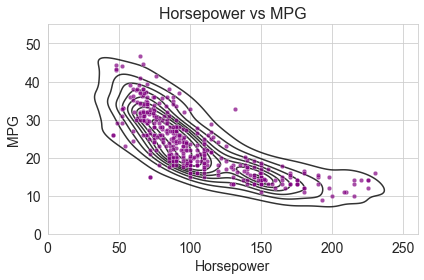

In [96]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg,color='black', shade=False, alpha=0.8)
sns.scatterplot(x=cars.horsepower, y=cars.mpg, color='purple', alpha=0.7, s=20, zorder=10)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.title('Horsepower vs MPG', fontsize=16)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout();

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


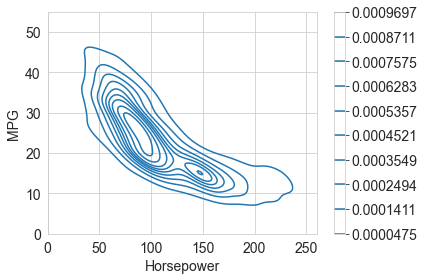

In [97]:
sns.kdeplot(cars.horsepower, cars.mpg,cbar=True)
#sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20, zorder=10)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout();

### Bivariate Demo

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


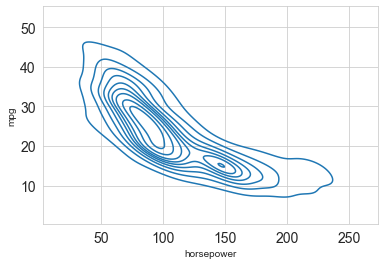

In [89]:
sns.kdeplot(cars.horsepower, cars.mpg);

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


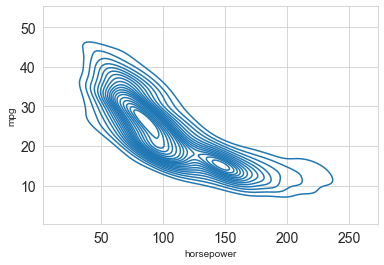

In [90]:
sns.kdeplot(cars.horsepower, cars.mpg, n_levels=20);
# More refined code

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


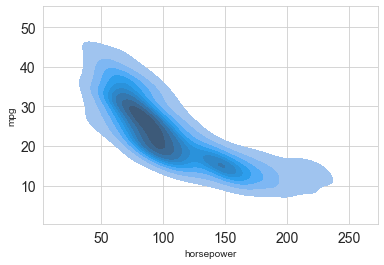

In [91]:
sns.kdeplot(cars.horsepower, cars.mpg, shade=True);

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


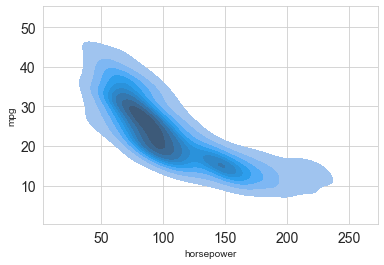

In [92]:
sns.set_style('whitegrid')

sns.kdeplot(cars.horsepower, cars.mpg, 
            shade=True,
            shade_lowest=False
           );

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


Text(-0.5, 0.5, 'Horsepower')

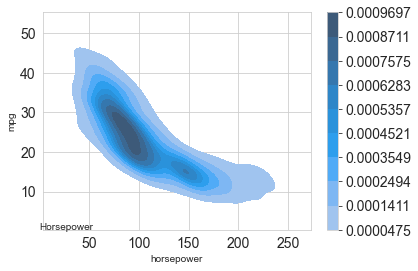

In [102]:
sns.kdeplot(cars.horsepower, cars.mpg, 
            shade=True, 
            shade_lowest=False,
            cbar=True
)


In [98]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Bivariate KDEplot by Category

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/distributions.p

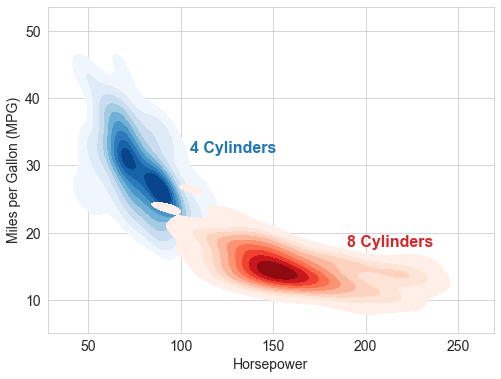

In [99]:
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(cyl_4.horsepower, cyl_4.mpg,
            cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(cyl_8.horsepower, cyl_8.mpg,
            cmap="Reds", shade=True, shade_lowest=False)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)

plt.annotate("4 Cylinders", (105, 32), color=blue, fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color=red, fontsize=16, fontweight='bold');

## Other Figures that use KDE

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


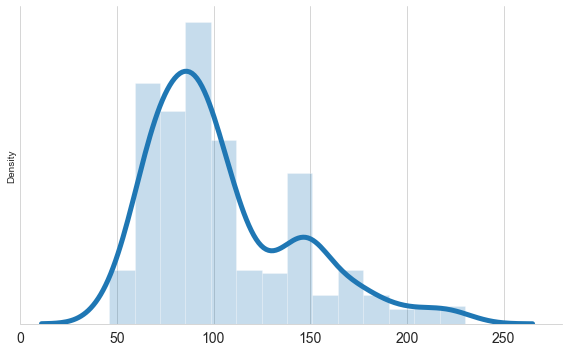

In [103]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

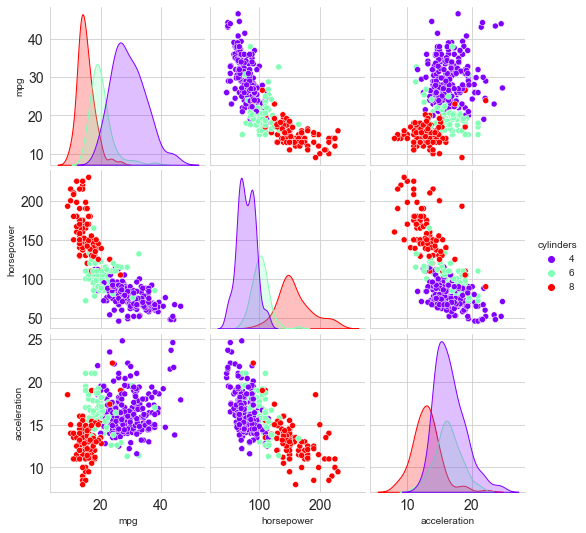

In [105]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])], 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'], 
             palette='rainbow',
            );